In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

2023-12-05 17:05:03.854432: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 17:05:03.876038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 17:05:03.876055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 17:05:03.876600: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 17:05:03.880227: I tensorflow/core/platform/cpu_feature_guar

In [6]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
# Load the CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

# Print the size of the datasets
print("Total training data: {} labels: {}".format(x_train_full.shape, y_train_full.shape))
print("Training data: {} labels: {}".format(x_train.shape, y_train.shape))
print("Validation data: {} labels: {}".format(x_val.shape, y_val.shape))
print("Test data: {} labels: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 55s 0us/step
Total training data: (50000, 32, 32, 3) labels: (50000, 1)
Training data: (40000, 32, 32, 3) labels: (40000, 1)
Validation data: (10000, 32, 32, 3) labels: (10000, 1)
Test data: (10000, 32, 32, 3) labels: (10000, 1)


In [7]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

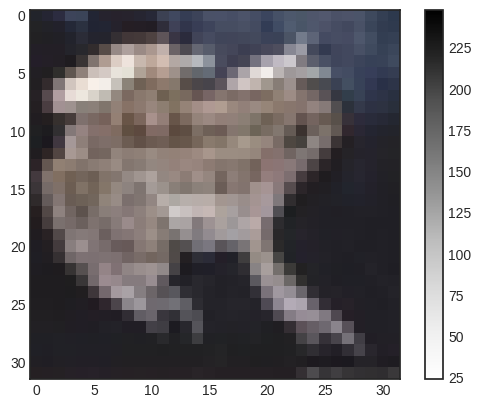

In [8]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [9]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
from tensorflow.keras.utils import to_categorical

# Reshape the data to 3072-dimensional vectors
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print the new shapes of the datasets
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(40000, 3072)
(10000, 3072)
(10000, 3072)


In [11]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from keras import models, layers ,utils

model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(3072,)))

# First dense layer
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# Second dense layer
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# Third dense layer
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()



2023-12-05 17:06:27.077219: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 17:06:27.081970: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 17:06:27.082008: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 17:06:27.084919: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 17:06:27.084970: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                       

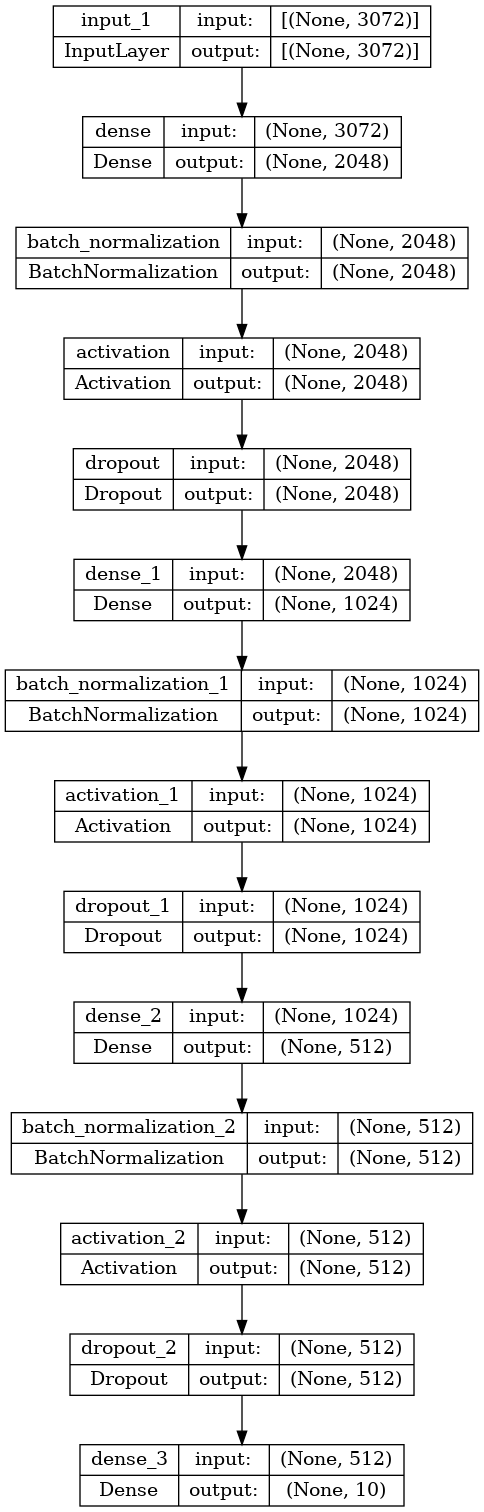

In [12]:
utils.plot_model(model, show_shapes=True)

In [13]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint callback to save the best model during training
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5', # This is the path where the model will be saved
    monitor='val_loss',       # The model's performance is evaluated based on the validation loss
    save_best_only=True,      # Only the best model will be saved
    verbose=1                 # Logging information is displayed
)

# EarlyStopping callback to stop training when the validation loss is not improving
early_stopping = EarlyStopping(
    monitor='val_loss',       # The model's performance is evaluated based on the validation loss
    patience=10,              # Training will be stopped after 10 epochs without improvement in validation loss
    verbose=1                 # Logging information is displayed
)

# Fit the model using the training data, and apply the callbacks
history = model.fit(
    x_train, y_train,
    epochs=100,                 # The maximum number of epochs to train for
    batch_size=64,              # The batch size
    validation_data=(x_val, y_val), # Validation data to monitor performance
    callbacks=[model_checkpoint, early_stopping], # List of callbacks to apply
    verbose=1                   # Logging information is displayed
)


Epoch 1/100


2023-12-05 17:06:41.642297: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f13c9d368f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 17:06:41.642328: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-05 17:06:41.647726: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-05 17:06:41.663136: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1701763601.717054    2065 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


621/625 [============================>.] - ETA: 0s - loss: 1.9721 - accuracy: 0.3153
Epoch 1: val_loss improved from inf to 1.78050, saving model to best_model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 8s 8ms/step - loss: 1.9703 - accuracy: 0.3159 - val_loss: 1.7805 - val_accuracy: 0.3543
Epoch 2/100
620/625 [============================>.] - ETA: 0s - loss: 1.6515 - accuracy: 0.4106
Epoch 2: val_loss did not improve from 1.78050
625/625 [==============================] - 4s 7ms/step - loss: 1.6509 - accuracy: 0.4108 - val_loss: 1.8888 - val_accuracy: 0.3366
Epoch 3/100
624/625 [============================>.] - ETA: 0s - loss: 1.5563 - accuracy: 0.4435
Epoch 3: val_loss did not improve from 1.78050
625/625 [==============================] - 4s 7ms/step - loss: 1.5562 - accuracy: 0.4436 - val_loss: 1.9290 - val_accuracy: 0.3288
Epoch 4/100
620/625 [============================>.] - ETA: 0s - loss: 1.4956 - accuracy: 0.4630
Epoch 4: val_loss improved from 1.78050 to 1.63727, saving model to best_model.h5
625/625 [==============================] - 4s 7ms/step - loss: 1.4956 - accuracy: 0.4629 - val_loss: 1.6373 - val_accuracy: 0.4133
Epoch 5/1

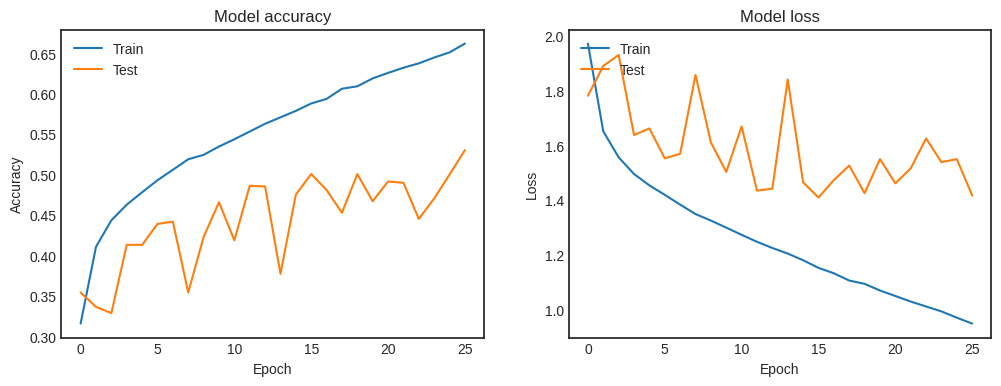

In [14]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

import matplotlib.pyplot as plt

# Assuming `history` is the output of the `fit` method of your model
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [15]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4301 - accuracy: 0.5192


[1.430058240890503, 0.5192000269889832]